# Comparison general cell count across mice strains

Notebook Plotting histograms and boxplots per group and per mouse across mice strains
- c57 with father 
- c57 without father 
- WILD without father 
- WILD with father

In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'

c57_wf = 'C57_MaleUrine_Exposure_cFos'
c57_wof = 'BL_woF'
wild_wf = 'WILD_with_father'
wild_wof = 'WILD_without_father'

data_directory_c57_wf = root_directory + experiment + '/' \
                + c57_wf + '/'
data_directory_c57_wof = root_directory + experiment + '/' \
                + c57_wof + '/'
data_directory_wild_wf = root_directory + experiment + '/' \
                + wild_wf + '/'
data_directory_wild_wof = root_directory + experiment + '/' \
                + wild_wof + '/'

In [4]:
def append_mouse_group(df, dictionary, group_label, variable_label='n_cells'):
    """
    Append data from a dictionary of results across mice to a DataFrame.

    This function loads a dictionary from a file, calculates a specified variable
    for each mouse, and appends this data along with a group label
    to an existing DataFrame.

    Parameters:
    df (pd.DataFrame): Existing DataFrame to append the data.
    dictionary (str): Name of the dictionary file (without '.npy') containing results.
    group_label (str): Label to assign to the group being appended.
    variable_label (str, optional): Label specifying the variable to calculate ('n_cells' or 'energy').
                                    Defaults to 'n_cells'.

    Returns:
    pd.DataFrame: Updated DataFrame with appended data.
    """
    # Load dictionary from file
    dataset = np.load('dict_results/newvolumes/dict_results_across_mice_' + dictionary + '.npy', 
                      allow_pickle=True).item()
    
    # Calculate the specified variable for each mouse in the dataset
    variable = [dataset[mouse][variable_label].sum() for mouse in dataset.keys()]
    
    # Create a DataFrame for the current mouse group
    df_mouse_group = pd.DataFrame(columns=[variable_label, 'group'])
    df_mouse_group[variable_label] = variable
    df_mouse_group['group'] = group_label
    
    # Append the new DataFrame to the existing DataFrame
    df = df.append(df_mouse_group)
    
    return df

In [15]:
def create_histogram(dataset, title):
    """
    Create a histogram based on the total number of cells per experimental group.

    This function calculates the total number of cells ('n_cells') for each mouse in 
    experimental groups ('Control', 'Fam', 'Unfam') from the provided dataset. It then 
    creates a histogram displaying these totals per mouse.

    Parameters:
    dataset (dict): Dictionary containing data for each mouse.
    title (str): Title for the histogram plot.

    Returns:
    matplotlib.figure.Figure, matplotlib.axes.Axes: Figure and Axes objects of the histogram plot.
    """
    # Divide mice into experimental groups
    experimental_groups = utils.divide_in_exp_groups(list_subjects=dataset.keys(),
                                                     group_labels=['Control', 'Fam', 'Unfam'])
    
    # Calculate total number of cells for each experimental group
    variable_control = [dataset[mouse]['n_cells'].sum() for mouse in experimental_groups['Control']]
    variable_fam = [dataset[mouse]['n_cells'].sum() for mouse in experimental_groups['Fam']]
    variable_unfam = [dataset[mouse]['n_cells'].sum() for mouse in experimental_groups['Unfam']]
    
    # Combine all variables and corresponding mice
    variable = variable_control + variable_fam + variable_unfam
    mouse_control = [mouse for mouse in experimental_groups['Control']]
    mouse_fam = [mouse for mouse in experimental_groups['Fam']]
    mouse_unfam = [mouse for mouse in experimental_groups['Unfam']]
    mouse = mouse_control + mouse_fam + mouse_unfam

    # Create figure and axis for the histogram
    fig, ax = plt.subplots(1, 1)
    ax.bar(mouse, height=variable)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_title(title)  # Set the title for the histogram plot
    
    return fig, ax

# Number of cells

In [5]:
df = {'n_cells', 'group'}
df = pd.DataFrame(columns=['n_cells', 'group'])

df = append_mouse_group(df=df, dictionary='c57_300', group_label='c57 with father')
df = append_mouse_group(df=df, dictionary='BL_woF2000', group_label='c57 without father')
df = append_mouse_group(df=df, dictionary='WILD_with_father2500_newwild', group_label='WILD with father')
df = append_mouse_group(df=df, dictionary='WILD_without_father2500', group_label='WILD without father')

<AxesSubplot:xlabel='n_cells', ylabel='group'>

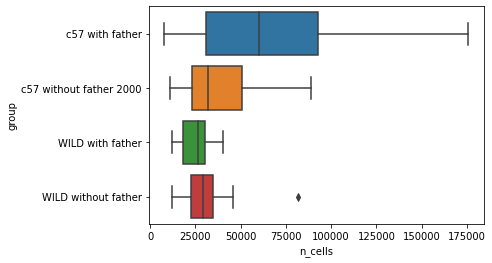

In [6]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="n_cells", y="group", ax=ax)
# fig.savefig('./figures/boxplot_ncells.png')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Black with father'}>)

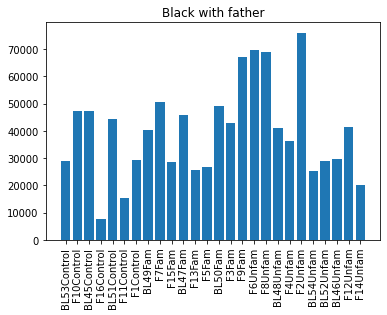

In [16]:
dataset = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy', 
                  allow_pickle=True).item()

create_histogram(dataset=dataset,
                title='Black with father')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Black without father'}>)

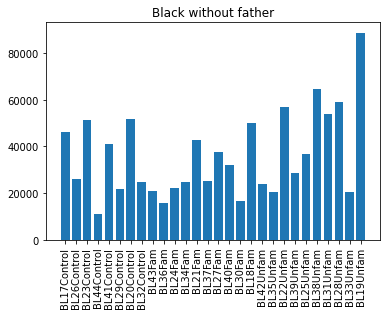

In [17]:
dataset = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy', 
                  allow_pickle=True).item()

create_histogram(dataset=dataset,
                title='Black without father')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'WILD with father'}>)

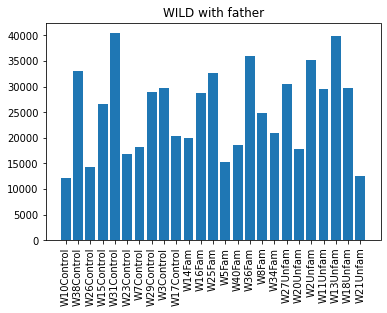

In [18]:
dataset = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                  allow_pickle=True).item()

create_histogram(dataset=dataset,
                title='WILD with father')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'WILD without father'}>)

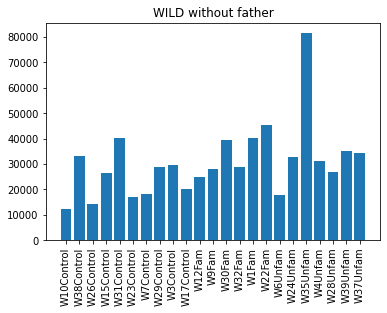

In [19]:
dataset = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', 
                  allow_pickle=True).item()

create_histogram(dataset=dataset,
                title='WILD without father')

# Energy

In [11]:
df = {'energy', 'group'}
df = pd.DataFrame(columns=['energy', 'group'])

df = append_mouse_group(df=df, dictionary='c57_merged_hemispheres_F6BL48', group_label='c57 with father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='BL_woF2000_36', group_label='c57 without father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='WILD_with_father2500_newwild', group_label='WILD with father', 
                        variable_label='energy')
df = append_mouse_group(df=df, dictionary='WILD_without_father2500', group_label='WILD without father', 
                        variable_label='energy')

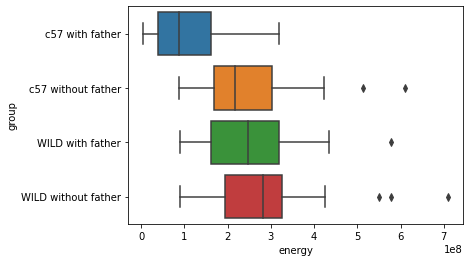

In [12]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="energy", y="group")
fig.savefig('./figures/boxplot_energy.png')